<a href="https://colab.research.google.com/github/Dingcyber/Studymaterials/blob/main/Mathematics%20for%20ML/Calculus_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#工具包(toolkit)

## Matplotlib

---

* `%matplotlib inline`:Jupyter Notebook|IPyhton的魔法命令，用于在Notebook中内嵌显示matplotlib绘制的图形，执行这个命令后，所有后续的matplotlib图形都会直接显示在单元格输出区域，不需要再调用`plt.show()`来显示图形，图形会称为Notebook文档的一部分。`%`表示这是一个行魔法命令，只影响当前行

### 函数可视化

---



In [19]:
# 构造函数可视化函数
import matplotlib.pyplot as plt
%matplotlib inline

def plot_f1_and_f2(f1, f2 = None, x_min = -5, x_max = 5, label1 = "f(x)", label2 = "f'(x)"):
  x = np.linspace(x_min, x_max, 100)

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  ax.spines["left"].set_position("center")
  ax.spines["bottom"].set_position("zero")
  ax.spines["right"].set_color("none")
  ax.spines["top"].set_color("none")
  ax.xaxis.set_ticks_position("bottom")
  ax.yaxis.set_ticks_position("left")

  plt.plot(x, f1(x), "r", label = label1)
  if not f2 is None:
    if isinstance(f2,np.ndarray):
      plt.plot(x, f2, "bo", markersize = 3, label = label2)
    else:
      plt.plot(x, f2(x), "b", label = label2)
  plt.legend()

  plt.show()

## SymPy

---
* `Sympy`:用于符号计算的Python库，可以处理符号表达式、代数方程、代数方程、微积分、离散数学、量子物理等多个数学领域的问题，通过符号计算，可以进行精确的数学推导
  * `import sympy as sp`: 导入整个sympy库，并使用sp作为别名
  * `from sympy import *`: 通配符导入，会将SymPy库中所有公开的函数、类和常量都导入到当前的命名空间中，可以直接使用它们而无需前缀，但可能会覆盖已有的函数或变量，带来命名冲突。在交互式环境中可能很方便，但编写脚本或大型项目时应避免使用这种方式
  * `from sympy.utilities.lambdify import lambdify`: `sympy.utilities.lambdify`是sympy中的一个模块，专门用于将Sympy符号表达式转换为可以数值计算的函数，`lambdify`是其中主要的函数
* 输出与打印：内置了强大的LaTeX输出功能，可以在JupyterNotebook中渲染出漂亮的数学公式
  * `init_printing(use_latex=True)`: 漂亮打印，导入`init_printing`模块后设置，以后所有的表达式都会以LaTeX格式渲染
  * `sp.latex()`:直接生成LaTeX代码
* 符号计算
  * `sp.symbols(names,**assumptions)`:用于创建符号变量，用符号可以创建表达式。`assumptions`中输入变量的假设条件（如实数、正数、整数等），如`real=True`|`positive=True`
  * `sp.expand()`: 展开表达式
  * `sp.factor()`: 因式分解
  * `sp.simplify()`: 化简，会尝试用各种方法化简表达式
  * `sp.sqrt()`: 表示符号计算中的平方根，括号内输入用于计算的数
* `sp.N(expr,[precision])`: 用于获取符号表达式的数值近似值的函数
  * `precision`: 可选，表示有效数字的位数，默认为15位
* `expr.evalf(n=15,subs=None,maxn=100,chop=False,strict=False,quad=None,verbose=False)`: 用于将符号表达式转换为数值近似值
  * `n`: 精度（有效数字位数），默认为15
  * `subs`: 替换字典，用于替换符号变量
  * `chop`: 是否截断接近0的小数
  * `strict`: 是否严格检查精度
  * `quad`: 接受一个字符串，用于指定在计算积分时使用的数值积分方法，默认使用自适应高斯-凯勒积分
  * `verbose`: 用于控制数值计算过程中的输出信息，如果设置为True，则在计算过程中会打印出一些调试信息
* `lambdify(args,expr,modules = None,**kwargs)`: 将SymPy表达式编译成可以在数值上评估的函数
  * `args`: 变量列表或元组，例如(x,y,z)或[x,y,z]，如果只有一个变量，也可以直接传入一个符号
  * `expr`: 要转换为数值函数的SymPy表达式
  * `modules`: 指定用于数值计算的后端模块，可以是字符串、列表或字典。常见的有`"numpy"`(支持数组输入)｜`"math`(仅支持标量)|`mpmath`(用于高精度计算)，也可以自定义模块映射




### 符号计算

---



In [ ]:
# Python表示数学公式（近似数）
import math
math.sqrt(18)

4.242640687119285

In [1]:
# SymPy表示数学公式（精确数）
from sympy import *
sqrt(18)

3*sqrt(2)

In [2]:
# 创建符号变量和符号表达式
x,y=symbols("x y")
expr = 2 * x ** 2 - x * y
expr

2*x**2 - x*y

In [3]:
# 符号表达式运算
expr_manip = x * (expr + x * y + x ** 3)
expr_manip

x*(x**3 + 2*x**2)

In [4]:
# 展开表达式
expand(expr_manip)

x**4 + 2*x**3

In [5]:
# 因式分解
factor(expr_manip)

x**3*(x + 2)

### 数值近似

---



In [ ]:
# 方法一：显示近似值
N(sqrt)

In [6]:
# 方法二：代入未知量的值
expr.evalf(subs = {x:-1,y:2})

4.00000000000000

In [16]:
# 方法二：给函数的未知量赋值
x = symbols("x")
f_symb = x ** 2
f_symb
f_symb.evalf(subs={x:3})

9.00000000000000

In [25]:
# 测试直接运算：尝试将数字代入表达式的变量
a = 1
try:
  f_symb(a)
except TypeError as err:
  print(err)

'Pow' object is not callable


In [17]:
# 测试直接运算：构造numpy数组
import numpy as np
x_array = np.array([1,2,3])
print(x_array)

[1 2 3]


In [19]:
# 测试直接运算：尝试将数组代入表达式的变量
try:
  f_symb(x_array)
except TypeError as err:
  print(err)

'Pow' object is not callable


In [20]:
# 方法三：导入新模块
from sympy.utilities.lambdify import lambdify

In [21]:
# 方法三：构造适用于数组的表达式
f_symb_numpy = lambdify(x,f_symb,"numpy")

In [22]:
# 方法三：将数组代入表达式的变量
print("x:\n",x_array)
print("f(x) = x ** 2:\n",f_symb_numpy(x_array))

x:
 [1 2 3]
f(x) = x ** 2:
 [1 4 9]


## JAX

---

* `JAX`: 由谷歌开发的一个用于高性能数值计算和机器学习的Python库，全称`Just After eXecution`，允许在熟悉的Python和NumPy代码上进行转换，从而获得极高的性能，可以理解为可微分、可加速的NumPy
  * `jax.numpy`: 与NumPy兼容的数组库，通常导入为`jnp`
  * `jax.lax`: 底层线性代数操作，提供更基础的操作符
  * `jax.grad`: 用于计算梯度
  * `jax.jit`: 用于即时编译函数
  * `jax.vmap`: 用于向量化函数
  * `jax.pmap`: 用于并行化函数
* `jnp.array(object,dtype = None,copy = True,order="K",ndmin=0)`:
  * `object`:
  * `dtype`:
  * `copy`:
  * `order`:
  * `ndmin`:
* `.at[].set()`:  `jnp`数组默认是不可变的，需要使用`x = x.at[].set()`这样的函数更新式语法进行重新赋值

In [26]:
from jax import grad,vmap
import jax.numpy as jnp

### 构造数组

---



In [27]:
# 构造一个jnp数组并查看类型
x_array_jnp = jnp.array([1.,2.,3.])

print("NumPy数组的类型：",type(x_array))
print("JAX NumPy数组的类型：",type(x_array_jnp))

NumPy数组的类型： <class 'numpy.ndarray'>
JAX NumPy数组的类型： <class 'jaxlib.xla_extension.ArrayImpl'>


In [28]:
# 通过转化NumPy数组构造jnp数组
x_array_jnp = jnp.array(x_array.astype("float32"))
print("JAX NumPy数组：",x_array_jnp)
print("JAX NumPy数组的类型：",type(x_array_jnp))

JAX NumPy数组： [1. 2. 3.]
JAX NumPy数组的类型： <class 'jaxlib.xla_extension.ArrayImpl'>


### 数组操作

---



In [29]:
# 大部分情况下适用于NumPy数组的运算也适用于jnp数组
print(x_array_jnp*2)
print(x_array_jnp[2])

[2. 4. 6.]
3.0


In [30]:
# 为NumPy数组重新赋值的方法不适用于jnp数组
try:
  x_array_jnp[2] = 4.0
except TypeError as err:
  print(err)

JAX arrays are immutable and do not support in-place item assignment. Instead of x[idx] = y, use x = x.at[idx].set(y) or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html


In [31]:
# 为jnp数组重新赋值
y_array_jnp = x_array_jnp.at[2].set(4.0)
print(y_array_jnp)

[1. 2. 4.]


In [32]:
# 有些jnp函数也可以运用于NumPy数组
print(jnp.log(x_array))
print(jnp.log(x_array_jnp))

[0.        0.6931472 1.0986123]
[0.        0.6931472 1.0986123]


# 微积分（Calculus）

## 微分（Differentiation）

---


* `sp.diff(expr,*symbols,**kwargs)`: SymPy中用于计算导数的函数，可以对符号表达式进行求导操作，包括普通导数、偏导数和高阶导数。但在处理不可导函数（中间有跳跃点）时会发生表达式膨胀并出现错误
  * `expr`: 要求导的表达式
  * `*symbols`: 对一个或多个变量求导
  * `**kwargs`: 额外参数（如求导次数）
* `expression swell`: 表达式膨胀，指的是在符号计算过程中，中间表达式的大小（如项数、深度等）急剧增长的现象。这会导致计算速度变慢和内存使用增加，甚至使得计算无法完成
* `np.gradient(f,*varargs,axis=None,edge_order=1)`: NumPy中用于计算N维数组的数值`梯度`（在连续情况下，梯度是导数在多维的推广）的函数，通过有限差分方法近似计算导数，特别适用于离散数据集的微分计算。但是在导数有跳跃的点是不准确的。而且这种方法的最大问题是速度慢，每次都需要函数评估，在机器学习模型中，有数百个参数和数百个导数需要计算，每次进行全函数评估都会减慢计算过程
  * `f`:输入数组（N维）
  * `*varargs`: 采样间距（标量或数组）
  * `axis`: 沿指定轴计算梯度
  * `edge_order`: 边界处理方式（1或2）
* `np.vectorize(pyfunc,otypes=None,doc=None,excluded=None,cache=False,signature=None)`: 伪向量化工具，将Python标量函数包装成能够处理数组的函数（即向量化函数），但其内部仍然是使用Python循环，并不是真正的向量化计算
  * `pyfunc`: 要向量化的Python函数
  * `otypes`: 输出数据类型
  * `excluded`: 排除某些参数，不进行向量化
  * `signature`: 定义输入输出维度的高级特性

### 自定义导数函数

---



In [10]:
# 构造函数
def f(x):
  return x ** 2
print(f(3))

9


In [ ]:
# 构造导数函数
def dfdx(x):
  return 2 * x
print(dfdx(3))

6


In [ ]:
# 将函数和导数运用于数组
import numpy as np

x_array = np.array([1,2,3])

print("x:\n",x_array)
print("f(x) = x**2:\n",f(x_array))
print("f'(x) = 2*x:\n",dfdx(x_array))

x:
 [1 2 3]
f(x) = x**2:
 [1 4 9]
f'(x) = 2*x:
 [2 4 6]


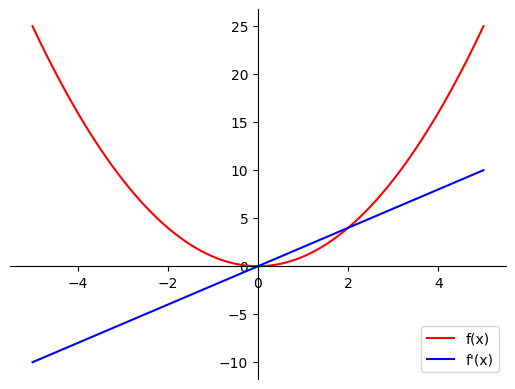

In [ ]:
# 作图
plot_f1_and_f2(f, dfdx)

### 符号微分（Symbolic differentiation）

---



In [1]:
import sympy as sp

In [9]:
import numpy as np

In [14]:
# 调包求简单函数微分
x = sp.symbols("x")
sp.diff(x ** 3, x)

3*x**2

In [16]:
# 调包求复合函数微分
dfdx_composed = sp.diff(sp.exp(-2 * x) + 3 * sp.sin(3 * x), x)
dfdx_composed

9*cos(3*x) - 2*exp(-2*x)

In [15]:
# 构造测试函数表达式
f_symb = x ** 2
f_symb

x**2

In [17]:
# 构造测试数组
x_array = np.array([1,2,3])

In [18]:
# 求测试函数微分并进行数值近似
dfdx_symb = sp.diff(f_symb, x)
dfdx_symb_numpy = sp.lambdify(x, dfdx_symb,'numpy')

print("x:\n",x_array)
print("f'(x) = 2x:\n",dfdx_symb_numpy(x_array))

x:
 [1 2 3]
f'(x) = 2x:
 [2 4 6]


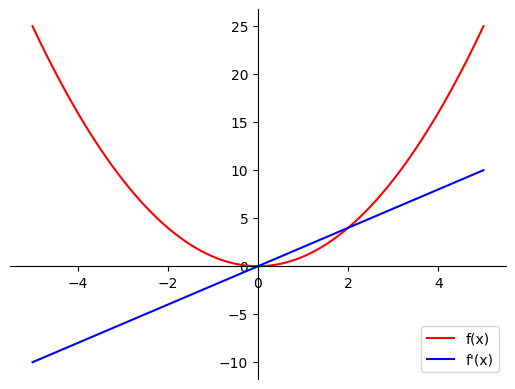

In [18]:
# 作图
f_symb_numpy = sp.lambdify(x,f_symb,"numpy") # 需要将函数符号表达式转化为数值表达式
plot_f1_and_f2(f_symb_numpy, dfdx_symb_numpy)

### 符号微分的局限性

---



In [3]:
# 局限性：构造绝对值函数
x = sp.symbols("x")
f_abs = sp.Abs(x)
f_abs

Abs(x)

In [7]:
# 局限性：：测试求绝对值函数的导数
dfdx_abs = sp.diff(f_abs,x)
dfdx_abs

(re(x)*Derivative(re(x), x) + im(x)*Derivative(im(x), x))*sign(x)/x

In [8]:
# 局限性：代入-2检测正确性
dfdx_abs.evalf(subs={x:-2})

-Subs(Derivative(re(x), x), x, -2)

### 数值微分（Numerical differentiation）

---



In [9]:
import numpy as np

In [11]:
# 构造测试数组
x_array_2 = np.linspace(-5,5,100) #(-5,5)区间内的100个等距点

In [13]:
# 调NumPy包求二次函数的导数
dfdx_numerical = np.gradient(f(x_array_2),x_array_2)
print(dfdx_numerical)

[-9.8989899  -9.7979798  -9.5959596  -9.39393939 -9.19191919 -8.98989899
 -8.78787879 -8.58585859 -8.38383838 -8.18181818 -7.97979798 -7.77777778
 -7.57575758 -7.37373737 -7.17171717 -6.96969697 -6.76767677 -6.56565657
 -6.36363636 -6.16161616 -5.95959596 -5.75757576 -5.55555556 -5.35353535
 -5.15151515 -4.94949495 -4.74747475 -4.54545455 -4.34343434 -4.14141414
 -3.93939394 -3.73737374 -3.53535354 -3.33333333 -3.13131313 -2.92929293
 -2.72727273 -2.52525253 -2.32323232 -2.12121212 -1.91919192 -1.71717172
 -1.51515152 -1.31313131 -1.11111111 -0.90909091 -0.70707071 -0.50505051
 -0.3030303  -0.1010101   0.1010101   0.3030303   0.50505051  0.70707071
  0.90909091  1.11111111  1.31313131  1.51515152  1.71717172  1.91919192
  2.12121212  2.32323232  2.52525253  2.72727273  2.92929293  3.13131313
  3.33333333  3.53535354  3.73737374  3.93939394  4.14141414  4.34343434
  4.54545455  4.74747475  4.94949495  5.15151515  5.35353535  5.55555556
  5.75757576  5.95959596  6.16161616  6.36363636  6

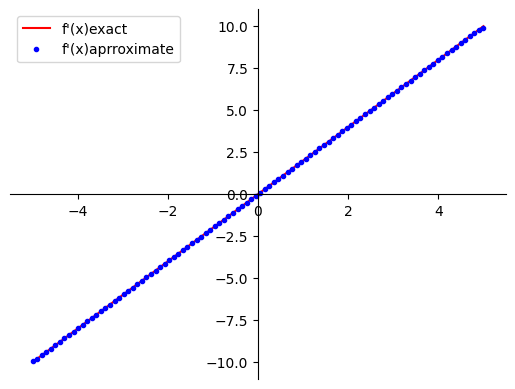

In [20]:
# 作图对比
plot_f1_and_f2(dfdx_symb_numpy,dfdx_numerical,label1="f'(x)exact",label2="f'(x)aprroximate")

In [21]:
# 调NumPy包求复合函数的导数
# 构造复合函数
def f_composed(x):
  return np.exp(-2*x)+3*np.sin(3*x)
# 求导
dfdx_composed_numerical = np.gradient(f_composed(x_array_2),x_array_2)
print(dfdx_composed_numerical)

[-3.98941004e+04 -3.62447432e+04 -2.96132029e+04 -2.41940601e+04
 -1.97657462e+04 -1.61472629e+04 -1.31907393e+04 -1.07753476e+04
 -8.80233260e+03 -7.19095386e+03 -5.87517346e+03 -4.80095652e+03
 -3.92407221e+03 -3.20830438e+03 -2.62399638e+03 -2.14686808e+03
 -1.75705364e+03 -1.43831773e+03 -1.17741551e+03 -9.63567734e+02
 -7.88027986e+02 -6.43723509e+02 -5.24955019e+02 -4.27144160e+02
 -3.46620015e+02 -2.80438287e+02 -2.26228539e+02 -1.82066156e+02
 -1.46366618e+02 -1.17800202e+02 -9.52254784e+01 -7.76399809e+01
 -6.41462637e+01 -5.39313057e+01 -4.62569498e+01 -4.04588204e+01
 -3.59510202e+01 -3.22338913e+01 -2.89022629e+01 -2.56519109e+01
 -2.22823885e+01 -1.86949552e+01 -1.48849565e+01 -1.09286701e+01
 -6.96526071e+00 -3.17503350e+00  2.44403288e-01  3.10219764e+00
  5.23659037e+00  6.53369611e+00  6.94118253e+00  6.47573668e+00
  5.22374829e+00  3.33523824e+00  1.01165901e+00 -1.51126076e+00
 -3.98401512e+00 -6.16525487e+00 -7.84312507e+00 -8.85403487e+00
 -9.09712719e+00 -8.54311

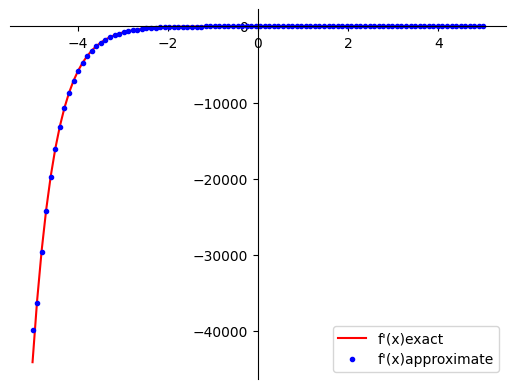

In [22]:
# 作图对比
dfdx_composed_numpy = sp.lambdify(x,dfdx_composed,"numpy")
plot_f1_and_f2(dfdx_composed_numpy,dfdx_composed_numerical,label1="f'(x)exact",label2="f'(x)approximate")

### 数值微分的局限性

---



In [23]:
# 构造绝对值函数的准确导数
def dfdx_abs_exact(x):
  if x > 0:
    return 1
  else:
    if x < 0:
      return -1
    else:
      return None

In [24]:
# 调NumPy包求绝对值函数的导数
dfdx_abs_numerical = np.gradient(abs(x_array_2),x_array_2)

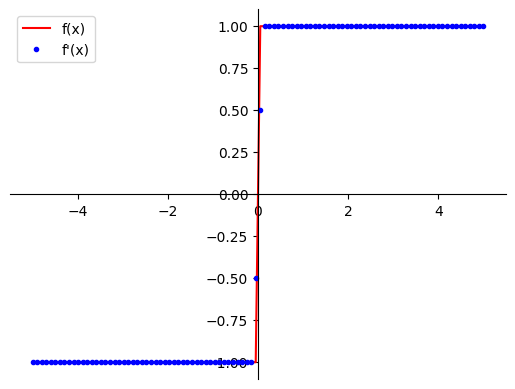

In [25]:
# 作图对比
plot_f1_and_f2(np.vectorize(dfdx_abs_exact),dfdx_abs_numerical)

### 自动微分（Automatic differentiation）

---



In [ ]:
from jax import grad,vmap
import jax.numpy as jnp

In [36]:
# 用自动微分求导
print("函数：f(x) = x ** 2")
print("自变量为3时的函数值：", f(3.0))
print("自变量为3时的导数值：", grad(f)(3.0))

函数：f(x) = x ** 2
自变量为3时的函数值： 9.0
自变量为3时的导数值： 6.0


In [37]:
# 自动微分不适用于整数
try:
  grad(f)(3)
except TypeError as err:
  print(err)

grad requires real- or complex-valued inputs (input dtype that is a sub-dtype of np.inexact), but got int32. If you want to use Boolean- or integer-valued inputs, use vjp or set allow_int to True.


In [38]:
# 尝试将自动微分应用于数组
try:
  grad(f)(x_array_jnp)
except TypeError as err:
  print(err)

Gradient only defined for scalar-output functions. Output had shape: (3,).


In [39]:
# 向量化自动微分以处理数组
dfdx_jax_vmap = vmap(grad(f))(x_array_jnp)
print(dfdx_jax_vmap)

[2. 4. 6.]


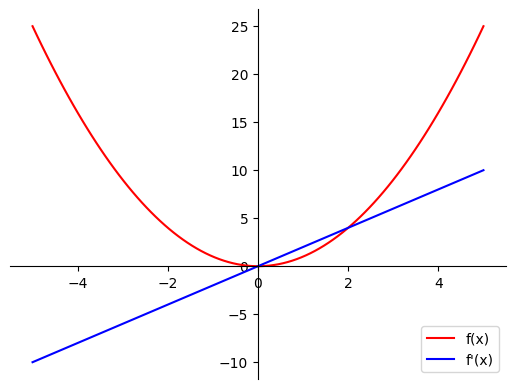

In [40]:
# 作图
plot_f1_and_f2(f,vmap(grad(f)))

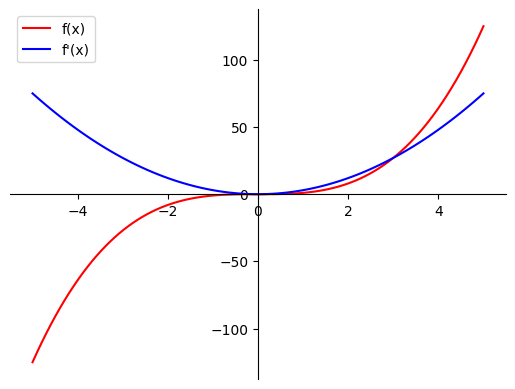

In [41]:
# 自动微分幂函数
def g(x):
  return x**3
plot_f1_and_f2(g,vmap(grad(g)))

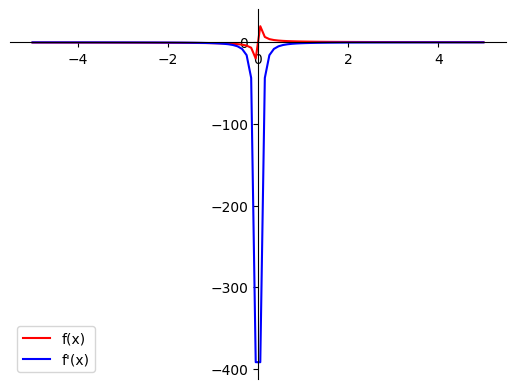

In [42]:
# 自动微分幂函数
def g(x):
  return 1/x
plot_f1_and_f2(g,vmap(grad(g)))

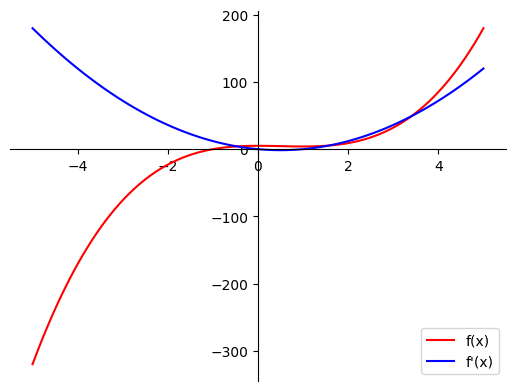

In [43]:
# 自动微分多项式函数
def g(x):
  return 2*x**3 - 3*x**2 + 5
plot_f1_and_f2(g,vmap(grad(g)))

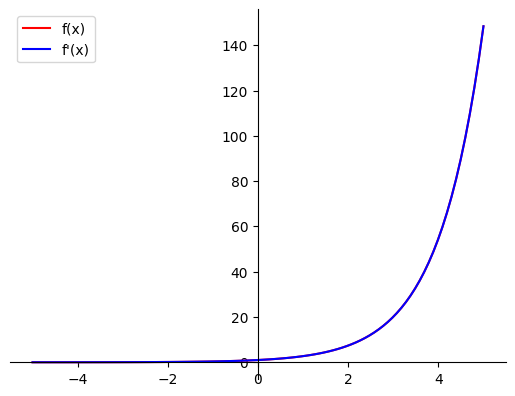

In [44]:
# 自动微分指数函数
def g(x):
  return jnp.exp(x)
plot_f1_and_f2(g,vmap(grad(g)))

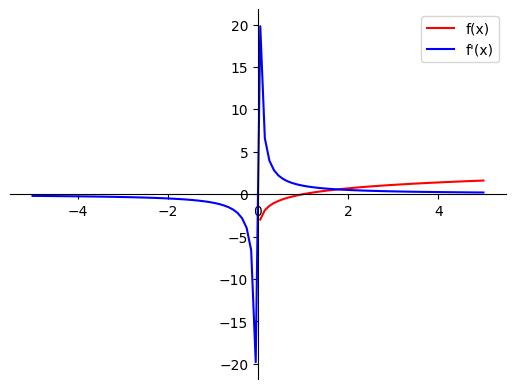

In [45]:
# 自动微分对数函数
def g(x):
  return jnp.log(x)
plot_f1_and_f2(g,vmap(grad(g)))

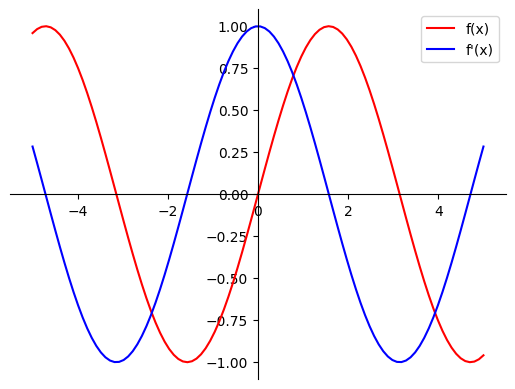

In [46]:
# 自动微分正弦函数
def g(x):
  return jnp.sin(x)
plot_f1_and_f2(g,vmap(grad(g)))

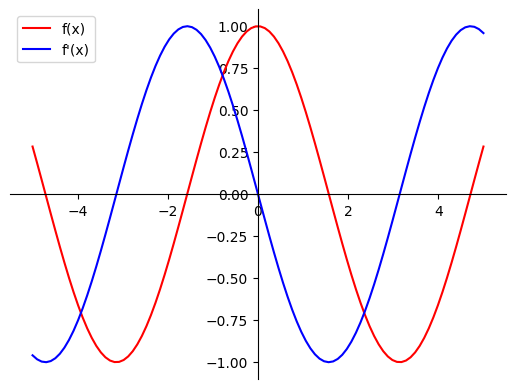

In [47]:
# 自动微分余弦函数
def g(x):
  return jnp.cos(x)
plot_f1_and_f2(g,vmap(grad(g)))

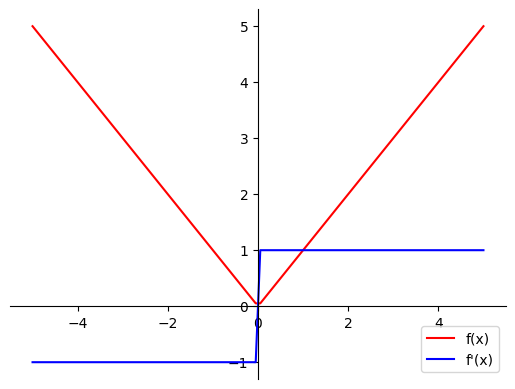

In [48]:
# 自动微分绝对值函数
def g(x):
  return jnp.abs(x)
plot_f1_and_f2(g,vmap(grad(g)))

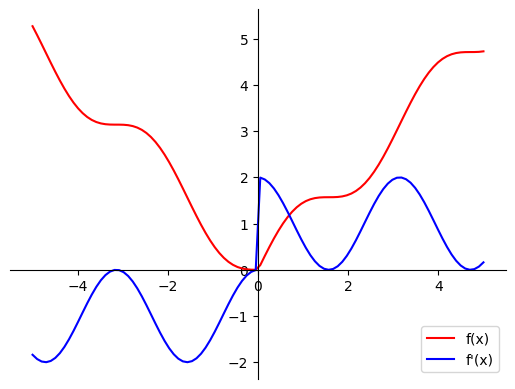

In [50]:
# 自动微分复合函数
def g(x):
  return jnp.abs(x)+jnp.sin(x)*jnp.cos(x)
plot_f1_and_f2(g,vmap(grad(g)))